In [ ]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargo los DF generados en el notebook anterior

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/train_120.csv',encoding='Latin-1')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_120.csv',encoding='Latin-1')

In [ ]:
features=train_data.columns
features=features.drop('Unnamed: 0')
features=features.drop('isFraud')

In [ ]:
X=train_data[features]
Y=train_data[['isFraud']]

Hago los splits de los DF y genero los parametros del modelo

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
params = {'objective':['binary:logistic'],'colsample_bytree': [0.5,.6,.7,.8,.9,1.0], 'learning_rate': [.075,.085,.09,.095,1.0],
                'max_depth' : [1,2,3,4,5,6,7,8,9,10], 'n_estimators' : [80,85,90,95,100],'seed':[123]}


In [ ]:
cv = RandomizedSearchCV(estimator=xgb.XGBRegressor(),param_distributions=params,scoring='roc_auc',cv=2,verbose=100)

entreno y busco los mejores estimadores de hiperparametros

In [ ]:
cv.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START colsample_bytree=0.5, learning_rate=1.0, max_depth=8, n_estimators=95, objective=binary:logistic, seed=123
[CV 1/2; 1/10] END colsample_bytree=0.5, learning_rate=1.0, max_depth=8, n_estimators=95, objective=binary:logistic, seed=123;, score=0.843 total time= 1.3min
[CV 2/2; 1/10] START colsample_bytree=0.5, learning_rate=1.0, max_depth=8, n_estimators=95, objective=binary:logistic, seed=123
[CV 2/2; 1/10] END colsample_bytree=0.5, learning_rate=1.0, max_depth=8, n_estimators=95, objective=binary:logistic, seed=123;, score=0.841 total time= 1.2min
[CV 1/2; 2/10] START colsample_bytree=0.5, learning_rate=0.095, max_depth=4, n_estimators=95, objective=binary:logistic, seed=123
[CV 1/2; 2/10] END colsample_bytree=0.5, learning_rate=0.095, max_depth=4, n_estimators=95, objective=binary:logistic, seed=123;, score=0.835 total time=  40.0s
[CV 2/2; 2/10] START colsample_bytree=0.5, learning_rate=0.095, max_depth=

RandomizedSearchCV(cv=2, estimator=XGBRegressor(),
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'learning_rate': [0.075, 0.085, 0.09,
                                                          0.095, 1.0],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [80, 85, 90, 95, 100],
                                        'objective': ['binary:logistic'],
                                        'seed': [123]},
                   scoring='roc_auc', verbose=100)

In [ ]:
cv.best_estimator_

XGBRegressor(colsample_bytree=0.7, learning_rate=0.09, max_depth=9,
             n_estimators=80, objective='binary:logistic', seed=123)

In [ ]:
estimator = xgb.XGBRegressor(colsample_bytree=0.7, learning_rate=0.09, max_depth=9,
             n_estimators=80, objective='binary:logistic', seed=123)

Entreno el modelo con el mejor estimador

In [ ]:
estimator.fit(x_train,y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.09, max_depth=9,
             n_estimators=80, objective='binary:logistic', seed=123)

In [ ]:
print(roc_auc_score(y_test, estimator.predict(x_test)))

0.8685873584276522


Hago los graficos de feature importance del modelo

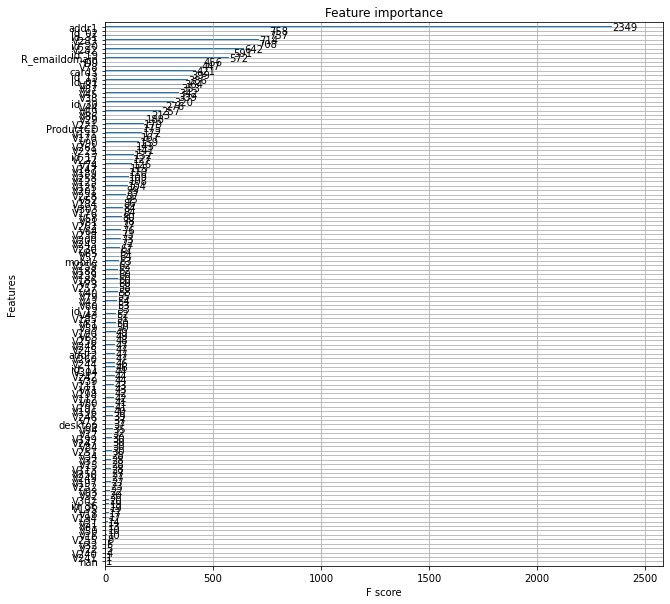

In [ ]:
xgb.plot_importance(estimator)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [ ]:
dmatrix = xgb.DMatrix(data=x_train[features],label=y_train,feature_names=features)

In [ ]:
xgb_reg=xgb.train(params={'colsample_bytree':0.9, 'learning_rate':0.075, 'max_depth':9,
             'n_estimators':90, 'objective':'binary:logistic', 'seed':123},dtrain=dmatrix,num_boost_round=10)

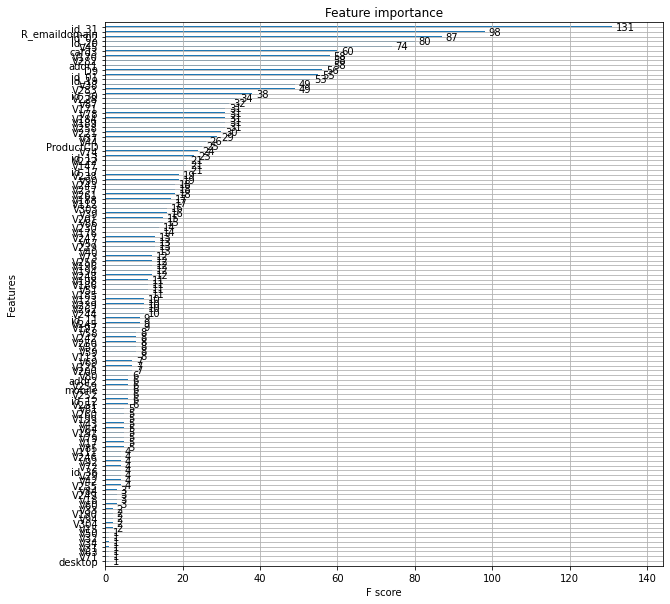

In [ ]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

busco los features mas importantes

In [ ]:
estimator.feature_importances_

array([0.00626378, 0.00707197, 0.00290756, 0.01788791, 0.00872006,
       0.00201388, 0.00306058, 0.00212506, 0.0024671 , 0.00336313,
       0.00418499, 0.00747778, 0.01195336, 0.00283154, 0.00410066,
       0.00786787, 0.01564528, 0.00196161, 0.00326949, 0.00380029,
       0.00614366, 0.0021866 , 0.00244041, 0.00640864, 0.01176694,
       0.0041966 , 0.00452781, 0.00426074, 0.00397081, 0.00871481,
       0.00440275, 0.00452794, 0.00462844, 0.00513233, 0.01015113,
       0.00637638, 0.00842995, 0.00509065, 0.00804081, 0.00285898,
       0.0036937 , 0.0027797 , 0.00350688, 0.00272421, 0.0034584 ,
       0.00248016, 0.00675324, 0.02487985, 0.00305817, 0.00352142,
       0.00880901, 0.00390192, 0.00462262, 0.00100419, 0.00631629,
       0.00354523, 0.01268184, 0.00487211, 0.00357783, 0.00311105,
       0.00325064, 0.00389675, 0.00268383, 0.00373688, 0.03599318,
       0.00442714, 0.00400473, 0.02294951, 0.00737859, 0.00441338,
       0.01328577, 0.00783664, 0.00491626, 0.00914264, 0.02753

In [ ]:
prueba = pd.DataFrame(estimator.feature_importances_,index=x_train.columns)

In [ ]:
prueba.head()

,0
ProductCD,0.006264
card3,0.007072
addr1,0.002908
addr2,0.017888
R_emaildomain,0.008720


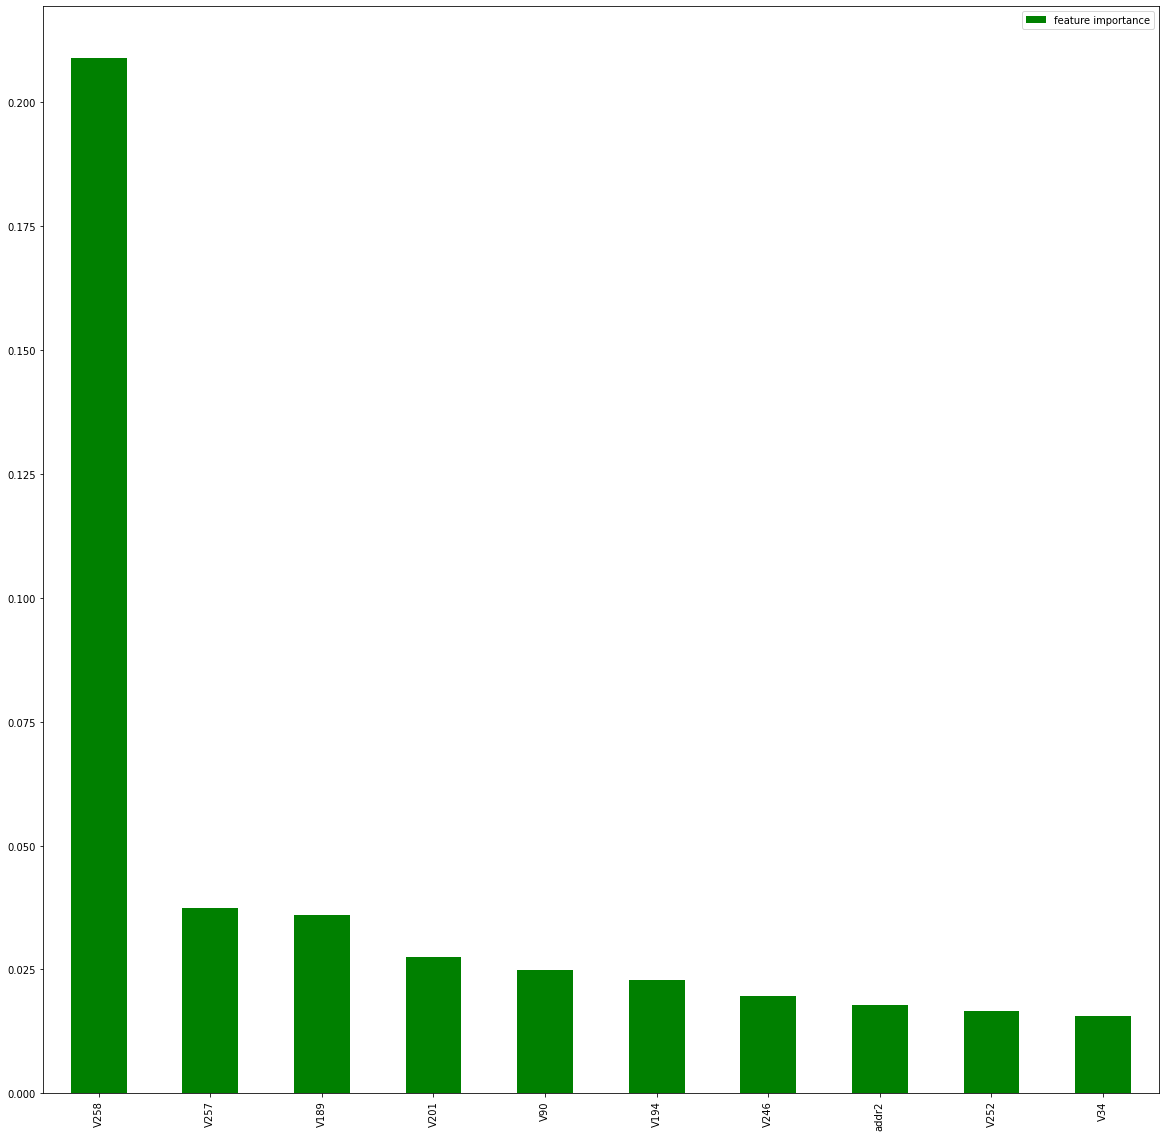

In [ ]:
prueba.rename(columns={0:'feature importance'},inplace=True)
prueba.sort_values(by=['feature importance'],ascending=False).head(10).plot.bar(y='feature importance',rot=90, color={'g'},)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
confusion_matrix(y_train,np.round(abs(estimator.predict(x_train))))

array([[398662,    168],
       [  9385,   5163]])

In [ ]:
a=ConfusionMatrixDisplay(confusion_matrix(y_train,np.round(abs(gb2.predict(x_train)))))
a

In [ ]:
test_data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
test_data.drop(columns=['id_31.1'],inplace=True)

In [ ]:
test_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/test_120_ids.csv',encoding='Latin-1')

Hago la prediccion de test y genero el csv para poder hacer el submit a Kaggle

In [ ]:
predict = estimator.predict(test_data)

In [ ]:
predict2 = pd.DataFrame(predict)

In [ ]:
predict2['TransactionID']=test_id['TransactionID']

In [ ]:
predict2.rename(columns={0:'isFraud'},inplace=True)

In [ ]:
predict2=predict2[['TransactionID','isFraud']]

In [ ]:
predict2.head()

,TransactionID,isFraud
0,3663549,0.008804
1,3663550,0.017538
2,3663551,0.018918
3,3663552,0.003173
4,3663553,0.005210


In [ ]:
predict2.to_csv('/content/drive/MyDrive/Colab Notebooks/TP3-DATOS-2C2021/to_kaggle_XGB.csv',index=False)

Score en Kaggle:
Private score: 0.818542
Public score: 0.840535